<a href="https://colab.research.google.com/github/lhskh307218/datascience/blob/main/lecture05_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [프로젝트 1] 파이썬으로 웹 스크래퍼 만들기
#### BeautifulSoup과 Selenium을 사용하여 빠르게 웹사이트를 스크랩하는 방법 실습하기

참고자료:
https://towardsdatascience.com/scrape-websites-using-python-in-5-minutes-931cd9f44443




---

이곳에 본인 정보 기입하기

---



## 서론
이 프로젝트에서는 파이썬 라이브러리로 웹 스크래퍼를 어떻게 만드는지를 배운다. 웹 스크래핑은 매우 훌륭한 스킬이며 데이터와 관련된 직업군에서 요구되는 스킬이다. 또한 인터넷으로부터 이미 만들어져 있는 데이터세트를 다운로드하지 않고 자기 자신 만의 데이터를 모으기 위한 좋은 방법이 된다. 

이 프로젝트를 통해서 여러분은 다음에 대하여 익숙해질 것이다:

*   웹 스크래핑이 무엇인가?
*   웹 스크래핑을 위해서 왜 파이썬을 사용하는가?
*   파이썬 라이브러리 -- BeautifulSoup과 Selenium
*   웹사이트로 부터 데이터를 가져와서 **dataframe**에 저장

## 웹 스크래핑이 무엇인가?
웹 스크래핑은 인터넷으로부터 데이터를 모으기 위한 자동화된 과정을 말한다.

몇 시간동안의 수작업 없이 몇 줄의 코드를 간단히 실행시켜 모든 데이터를 가져올 수 있고 데이터 프레임에 저장할 수 있다.

그 이후에는 이 데이터를 정렬하거나 원하는 정보를 쉽게 찾을 수 있다.

이는 많은 시간과 노력을 줄여줄 수 있다. 프로그래밍에 익숙치 않은 학생들도 코드를 통해 지겨운 작업을 자동화하는 것은 배워둘만한 스킬이라 할 수 있다.

이것이 이 프로젝트에서 학습하고자 하는 것이며, 각 단계별로 코드와 함께 설명할 것입니다.

미래에 다른 유사한 작업을 할 때에도 동일한 코드를 사용할 수 있을 것이다.

## 데이터 스크래핑하기
이제 파이썬으로 웹 스크래핑하는 과정을 단계별로 설명할 것이다. 이 프로젝트에서는 구글의 Colaboratory를 사용하며, 다른 IDE를 사용해도 별 상관은 없다. 다만, 시작하기 전에 `Pandas` 라이브러리를 설치해야 한다.

### 단계 1: 라이브러리
앞서 설명한 바와 같이 본 프로젝트에서는 훌륭한 데이터 과학 교육과정을 찾기 위해 웹 사이트를 스크랩할 것이다.

[Class Central](https://www.classcentral.com/subject/data-science)이라고 불리는 홈페이지를 스크랩할 것이다. 이 홈페이지에는 다양한 토픽의 온라인 교육과정을 보여주고 있다.

데이터 과학과 관련된 정보를 스크랩할 것이다:

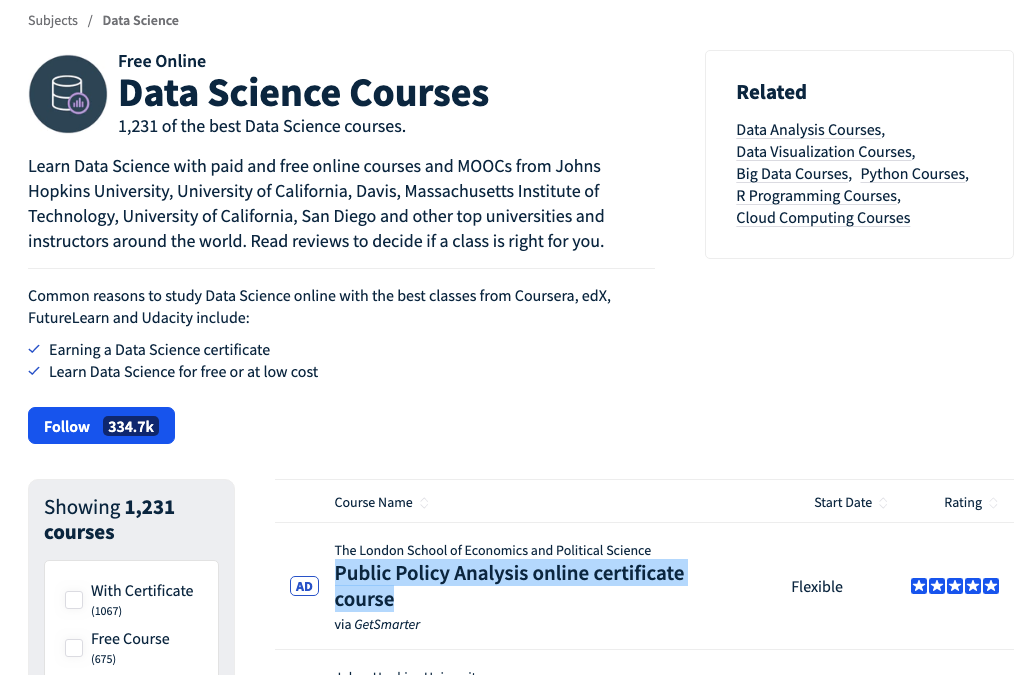

만약 여러분이 해당 페이지를 살펴보면 온라인 교육과정과 관련된 정보인 - 제목, 제공자, 평가 및 리뷰 등을 볼 수 있을 것이다. 이 사이트를 스크랩하기 위해서는 먼저 BeautifulSoup, Selenium 그리고 Pandas 등을 다운로드할 필요가 있다.

다음의 코드를 실행하면 된다. 이때 구글 colab환경에서 selenium 및 웹 드라이버를 사용할 수 있도록 하는 kora 패키지를 설치해보자.

In [ ]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!apt install chromium-chromedriver
#!pip install webdriver-manager
!pip install kora -q

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 2.7 MB/s 


다음은 다음의 import와 웹 드라이버를 실행해야 한다.

In [ ]:
from kora.selenium import wd
from bs4 import BeautifulSoup
import pandas as pd

### 단계 2: 웹 페이지 접근하기
그 다음은 스크랩하고자 하는 웹 페이지를 접근해야 한다. 본 실습에는 Class Central 웹사이트의 data science 섹션을 접근할 것이다.

In [ ]:
wd.get('https://www.classcentral.com/subject/data-science')
html = BeautifulSoup(wd.page_source)

In [ ]:
print(html)

<html class="sticky-footer " data-name="CONTEXT_BAR" lang="en"><head>
<meta content="543074773853-5o4th7sqent0dc5f0slvn0cakr152fpv.apps.googleusercontent.com" name="google-signin-client_id"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Class Central" name="application-name"/>
<title>
        1300+ Data Science Courses [2021] | Learn Online for Free | Class Central
    </title>
<meta content="Best online courses in Data Science from Johns Hopkins University, University of California, Davis, University of Michigan, Massachusetts Institute of Technology and other top universities around the world" name="description"/>
<meta content="Data Science | Free Online Courses | Class Central" property="og:title"/>
<meta content="https://www.classcentral.com/subject/data-science" property="og:url"/>
<meta content="https://ccweb.imgix.net/https%3A%2F%2Fwww.classcentral.com%2Fimages%2Fmeta%2Fmeta-catalog-bg.png?blend=https%3A%2F%2Fass

### 단계 3: 데이터
이제 웹 페이지로부터 데이터를 가져올 것이다.

다음의 웹 페이지의 화면 캡쳐 영상을 살펴보도록 하자.

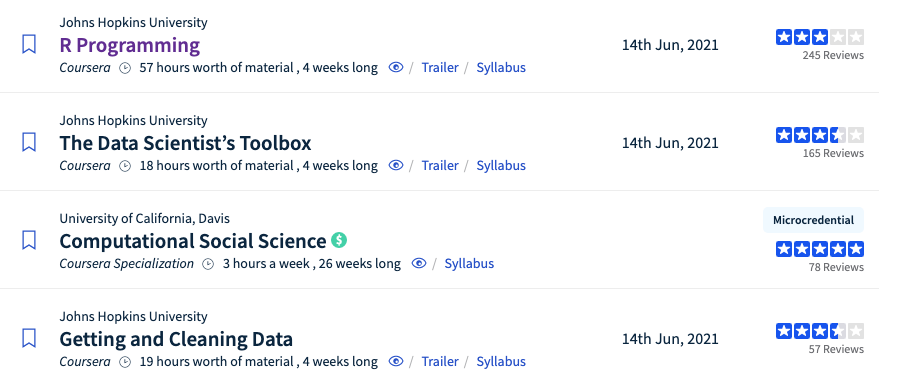

이 실습에서는 다음과 같은 정보를 가져올 것이다.

* 과목 이름 (Course Title)
* 리뷰 수 (Number of Reviews)
* 평가 (Rating)
* 제공자 (Provider)
* 기간 (Duration)

먼저 이를 변수에 대한 빈 배열을 생성하고, 나중에 이 배열 속에 스크랩한 정보를 저장할 것이다.

In [ ]:
Course = []
Duration = []
Start_Date = []
Offered_By = []
No_Of_Reviews = []
Rating = []

### 단계 4: 메소드 (Methods)
다음은 다음의 코드를 실행해보자. 이 두 메소드는 불필요한 태그 속의 텍스트만을 추출하기 위해 사용된다.

In [ ]:
def find_1st(string, substring):
    return string.find(substring, string.find(substring))
    
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)


### 단계 5: 교육과정의 제목 (Course Titles) 스크랩하기
이제 각 개별 요소들을 스크랩할 수 있다. 먼저 코스 제목을 스크랩해보도록 하자.

이를 위해서는 크롬 브라우저에서 해당 웹 페이지로 가서, 교과목 제목 위에서 오른쪽 버튼을 누른 후 "inspect" 메뉴를 클릭한다.

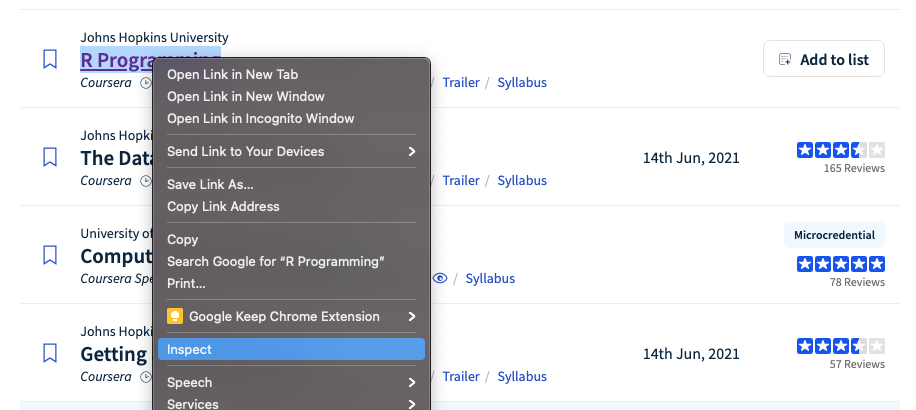


다음과 같은 윈도우 팝업 창이 화면에 나타날 것이다.

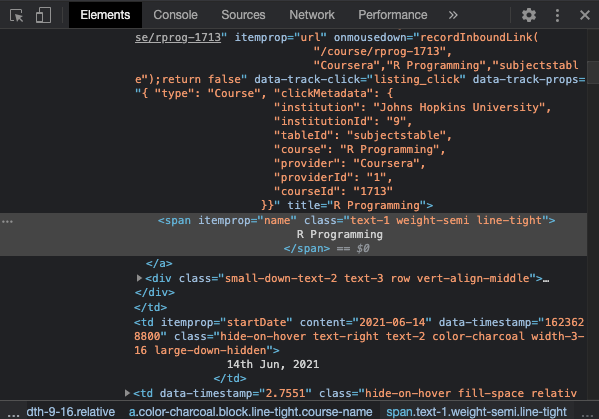

이는 여러분의 화면에서 보여지는 정보는 HTML 요소들이다. 모든 `title`은 동일한 HTML 태그를 가진다는 것을 알 수 있다.

위의 예처럼 해당 span 태크는 `class`가 `'text-1 weight-semi line-tight'`인 속성을 가지고 있다.

다음 코드를 통해서 특정 태그를 갖는 모든 데이터를 가져올 수 있다. 이 경우, 다음 코드를 실행하면 course title을 모두 스크랩할 수 있게 된다.

In [ ]:
for i in html.findAll("h2", {'class' : 'text-1 weight-semi line-tight margin-bottom-xxsmall'}):
    b = str(i)
    print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    #Course.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])

<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">The Data Scientist’s Toolbox</h2>
The Data Scientist’s Toolbox</h2>
<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">R Programming</h2>
R Programming</h2>
<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">Computational Social Science</h2>
Computational Social Science</h2>
<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">Getting and Cleaning Data</h2>
Getting and Cleaning Data</h2>
<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">Introduction to Data Science in Python</h2>
Introduction to Data Science in Python</h2>
<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">The Analytics Edge</h2>
The Analytics Edge</h2>
<h2 class="text-1 weight-semi line-tight margin-bottom-xxsmall" itemprop="name">Exploratory Data Analysis</h2>
Exploratory Data Analysis</h2>
<h2 cl

`findAll` 메소드는 태그를 포함한 결과를 얻기 때문에, 모든 course title을 스크래핑한 이후에는 위에서 만든 메소드를 사용하여 데이터를 정제할 필요가 있다. 그 결과를 출력하고 미리 만들어놓은 배열에 추가하면 다음과 같은 결과를 얻을 수 있다.

In [ ]:
Course

['The Data Scientist’s Toolbox',
 'R Programming',
 'Computational Social Science',
 'Getting and Cleaning Data',
 'The Analytics Edge',
 'Exploratory Data Analysis',
 'Become a Data Analyst',
 'Introduction to Big Data',
 'Introduction to Data Science in Python',
 'Python for Data Science',
 'Introducción a la Ciencia de Datos con Python',
 'Mastering Data Analysis in Excel',
 'A Crash Course in Data Science',
 'Hadoop Platform and Application Framework',
 'Probability - The Science of Uncertainty and Data']

15개의 과목명을 얻을 수 있을 것이다. 이 데이터의 앞 뒤로 공란 등이 포함되어 있다면, 이를 제거하기 위해서 다음의 코드를 실행해보도록 하자:

In [ ]:
course = []
for i in Course:
    i = i.strip() # The strip() method removes any leading and trailing characters
                  # (space is the default leading character to remove)
    #print(i)
    course.append(i)

이제 우리는 모든 course title 데이터를 'course' 배열에 저장하였다. 추후에 이 데이터를 data frame에 포함시킬 것이다.

### 단계 6: 교육과정 제공자 (Course Provider) 스크랩하기
위와 비슷하게, course provider 정보를 스크랩한다. course provider의 예로는 'edX’, 혹은 ‘Coursera’ 등이다.

course provider를 스크랩하는 과정은 단계 5와 유사하기 때문에 상세한 내용은 설명하지 않겠다. 다음의 코드를 실행하면 된다.

In [ ]:
# Provider/Offered By:
for i in html.findAll('a',href=True, attrs={'class':'color-charcoal italic'}):
    b = str(i)
    #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    Offered_By.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])

provider = []
for i in Offered_By:
    i = i.strip()
    provider.append(i)

### 단계 7: 평가 등급 (Course Rating) 스크랩하기

In [ ]:
# rating:
rat = []
for d in html.findAll('div', attrs={'class':'col border-box text-center nowrap row large-up-text-right padding-horz-small push'}):
    abc = d.find('span', attrs={'class':'xlarge-up-hidden color-charcoal text-center'})
    if abc is not None:
        #print(abc.text)
        rat.append(abc.text)
    else:
        rat.append('-1')

for i in rat:
    i = i.strip()
    #print(i)
    Rating.append(i)

### 단계 8: 리뷰 (Reviews) 스크랩하기

In [ ]:
# Num of Reviews
for i in html.findAll("span",{'class' : 'large-down-hidden block line-tight text-4 color-gray'}):
    b = str(i)
    #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    No_Of_Reviews.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])

num_reviews = []
for i in No_Of_Reviews:
    i = i.strip()
    print(i)
    num_reviews.append(i) 

245 Reviews
165 Reviews
57 Reviews
78 Reviews
46 Reviews
80 Reviews
39 Reviews
65 Reviews
34 Reviews
35 Reviews
33 Reviews
47 Reviews
27 Reviews
26 Reviews
23 Reviews
25 Reviews
32 Reviews
25 Reviews
31 Reviews
24 Reviews
20 Reviews
41 Reviews
41 Reviews
18 Reviews
21 Reviews
20 Reviews
17 Reviews
37 Reviews
14 Reviews
22 Reviews
35 Reviews
13 Reviews
12 Reviews
32 Reviews
11 Reviews
9 Reviews
26 Reviews
9 Reviews
17 Reviews
10 Reviews
9 Reviews
5 Reviews
9 Reviews
10 Reviews
4 Reviews
4 Reviews
6 Reviews
4 Reviews
6 Reviews


### 단계 9: 기간 (Course Duration) 스크랩하기


In [ ]:
t = []
for d in html.findAll('div', attrs={'class':'small-down-text-2 text-3 row vert-align-middle'}):
    abc = d.find('span', attrs={'class':'hidden medium-up-inline-block small-down-text-2 text-3 large-up-margin-left-xxsmall icon-clock-charcoal icon-left-small'})
    if abc is not None:
        #print(abc.text)
        t.append(abc.text)
    else:
        t.append('-1')

duration = []
for i in t:
    i = i.strip()
    #print(i)
    duration.append(i)

durationn = []
for i in duration:
    i = ' '.join(i.split())
    i = i.replace('\n','')
    #print(i)
    durationn.append(i)

### 단계 10: Data Frame에 추가하기
이제 모든 필요한 데이터는 스크랩하여 정제하였다. 그리고 배열에 추가하였다.

이제는 이 모든 데이터를 data frame에 포함시키기 위해 다음 코드를 실행해보자.

In [ ]:
import pandas as pd

dfDS = pd.DataFrame({'course':course,'ratings': Rating,'No_of_Reviews':num_reviews,'provider':provider, 'Duration':durationn})

ValueError: ignored

위 코드를 실행하면 오류가 발생한다. 이는 각 배열의 크기가 다르기 때문에 발생하는 문제로써, 결론을 먼저 이야기하면 리뷰를 하지 않은 신설 교육과정의 경우에 대한 적절한 처리를 하지 않아서 발생된 오류이다.

아래의 그림처럼 'Capstone Exam in Statistics and Data Science' 과목의 경우 아직 리뷰가 없다.

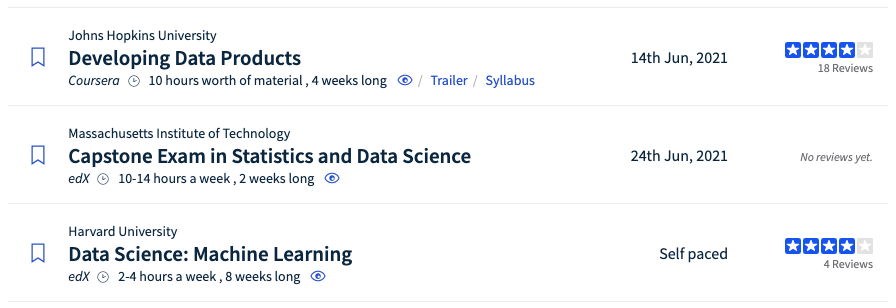

각 배열의 크기를 출력해보면 num_reviews 배열이 하나 작은 것을 알 수 있다.

In [ ]:
print(len(course), len(Rating), len(num_reviews), len(provider), len(durationn))

50 50 49 50 50


임시 방편으로 num_reviews 배열의 마지막에 임의로 '-1'을 추가하여 50개의 요소가 되도록 변경하였다.

In [ ]:
num_reviews.append('-1')

이제 다시 data frame을 해당 배열을 사용하여 생성 후 dfDS의 내용을 확인해 보면 다음과 같은 결과를 얻을 수 있다:

In [ ]:
dfDS = pd.DataFrame({'course':course,'ratings': Rating,'No_of_Reviews':num_reviews,'provider':provider, 'Duration':durationn})
dfDS

,course,ratings,No_of_Reviews,provider,Duration
0,R Programming,2.8,245 Reviews,Coursera,"57 hours worth of material , 4 weeks long"
1,The Data Scientist’s Toolbox,3.3,165 Reviews,Coursera,"18 hours worth of material , 4 weeks long"
2,Getting and Cleaning Data,3.5,57 Reviews,Coursera,"19 hours worth of material , 4 weeks long"
3,Computational Social Science,4.8,78 Reviews,Coursera,"3 hours a week , 26 weeks long"
4,Introduction to Data Science in Python,2.4,46 Reviews,Coursera,"29 hours worth of material , 4 weeks long"
5,The Analytics Edge,4.7,80 Reviews,edX,"10-15 hours a week , 13 weeks long"
6,Exploratory Data Analysis,3.9,39 Reviews,Coursera,1 week long
7,Become a Data Analyst,4.5,65 Reviews,Udacity,"10 hours a week , 17 weeks long"
8,Statistical Inference,2.8,34 Reviews,Coursera,"54 hours worth of material , 4 weeks long"
9,Introduction to Big Data,2.7,35 Reviews,Coursera,"17 hours worth of material , 3 weeks long"


## 문제 해결

지금까지 진행해온 방법의 근본적인 문제는 각 course에 대하여 관련 정보들이 모두 집약되어 있음에도 불구하고 홈페이지를 스크래핑하는 동안 특정 정보를 포함하는 태그를 `findAll`을 통해 스크랩함으로써 특정 태그가 없는 데이터의 경우에는 오작동하는 것을 확인할 수 있었다. 이를 해결하기 위해서는 각 데이터를 모두 포함하고 있는 태그를 찾은 후에 해당 태그 내에 있는 각종 정보를 동일한 방식으로 찾고, 해당 정보가 없다면 '-1' (예를 들면, No reviews)로 마킹함으로써 모든 데이터가 해당 정보가 없더라도 오류 없이 데이터를 확보할 수 있게 된다. 

In [ ]:
Course = []
Provider = []
Rating = []
Num_reviews = []
Duration = []

for tr in html.findAll('tr', attrs={'class':'row nowrap vert-align-middle padding-vert-small border-bottom border-gray-light'}):
    # Courses
    courseSpan = tr.find("span",{'class' : 'text-1 weight-semi line-tight'})
    b = str(courseSpan)
    c = b[find_1st(b,'>')+1:find_2nd(b,'<')]
    #print(c.strip())
    Course.append(c.strip())

    # Provider
    providerA = tr.find('a',href=True, attrs={'class':'color-charcoal italic'})
    b = str(providerA)
    c = b[find_1st(b,'>')+1:find_2nd(b,'<')]
    #print(c.strip())
    Provider.append(c.strip())

    # Rating
    d = tr.find('div', attrs={'class':'col border-box text-center nowrap row large-up-text-right padding-horz-small push'})
    abc = d.find('span', attrs={'class':'xlarge-up-hidden color-charcoal text-center'})
    if abc is not None:
        #print(abc.text.strip())
        Rating.append(abc.text.strip())
    else:
        #print('-1')
        Rating.append('-1')

    # Num of Reviews
    reviewSpan = tr.find("span",{'class' : 'large-down-hidden block line-tight text-4 color-gray'})
    if reviewSpan is not None:
        b = str(reviewSpan)
        c = b[find_1st(b,'>')+1:find_2nd(b,'<')]
        #print(c.strip())
        Num_reviews.append(c.strip())
    else:
        #print('-1')
        Num_reviews.append('-1')

    # Duration
    durationDiv = tr.find('div', attrs={'class':'small-down-text-2 text-3 row vert-align-middle'})
    abc = durationDiv.find('span', attrs={'class':'hidden medium-up-inline-block small-down-text-2 text-3 large-up-margin-left-xxsmall icon-clock-charcoal icon-left-small'})
    if abc is not None:
        i = abc.text.strip()
        i = ' '.join(i.split())
        i = i.replace('\n', '')
        #print(i)
        Duration.append(i)
    else:
        #print('-1')
        Duration.append(-1)

dfDS2 = pd.DataFrame({'course': Course,'ratings': Rating,'No_of_Reviews': Num_reviews,'provider': Provider, 'Duration': Duration})

,course,ratings,No_of_Reviews,provider,Duration
0,R Programming,2.8,245 Reviews,Coursera,"57 hours worth of material , 4 weeks long"
1,The Data Scientist’s Toolbox,3.3,165 Reviews,Coursera,"18 hours worth of material , 4 weeks long"
2,Getting and Cleaning Data,3.5,57 Reviews,Coursera,"19 hours worth of material , 4 weeks long"
3,Computational Social Science,4.8,78 Reviews,Coursera,"3 hours a week , 26 weeks long"
4,Introduction to Data Science in Python,2.4,46 Reviews,Coursera,"29 hours worth of material , 4 weeks long"
5,The Analytics Edge,4.7,80 Reviews,edX,"10-15 hours a week , 13 weeks long"
6,Exploratory Data Analysis,3.9,39 Reviews,Coursera,1 week long
7,Become a Data Analyst,4.5,65 Reviews,Udacity,"10 hours a week , 17 weeks long"
8,Statistical Inference,2.8,34 Reviews,Coursera,"54 hours worth of material , 4 weeks long"
9,Introduction to Big Data,2.7,35 Reviews,Coursera,"17 hours worth of material , 3 weeks long"


# 최종 결과

In [ ]:
dfDS2

,course,ratings,No_of_Reviews,provider,Duration
0,R Programming,2.8,245 Reviews,Coursera,"57 hours worth of material , 4 weeks long"
1,The Data Scientist’s Toolbox,3.3,165 Reviews,Coursera,"18 hours worth of material , 4 weeks long"
2,Getting and Cleaning Data,3.5,57 Reviews,Coursera,"19 hours worth of material , 4 weeks long"
3,Computational Social Science,4.8,78 Reviews,Coursera,"3 hours a week , 26 weeks long"
4,Introduction to Data Science in Python,2.4,46 Reviews,Coursera,"29 hours worth of material , 4 weeks long"
5,The Analytics Edge,4.7,80 Reviews,edX,"10-15 hours a week , 13 weeks long"
6,Exploratory Data Analysis,3.9,39 Reviews,Coursera,1 week long
7,Become a Data Analyst,4.5,65 Reviews,Udacity,"10 hours a week , 17 weeks long"
8,Statistical Inference,2.8,34 Reviews,Coursera,"54 hours worth of material , 4 weeks long"
9,Introduction to Big Data,2.7,35 Reviews,Coursera,"17 hours worth of material , 3 weeks long"


# 프로젝트 1 완성하기



1. 해당 홈페이지 스크래핑이 되도록 코드 수정하기
2. 현재 15개의 과목만을 스크래핑하고 있음. 여러 페이지를 스크래핑하여 원하는 과목 개수만큼 스크래핑하는 코드로 확장하기 
3. 본 데이터로부터 어떠한 정보를 얻을 수 있을 지를 고민해보고, 그 과정을 문서셀과 코드셀로 추가 작성하고, 필요하다면 적절히 가시화하여 보여주고, 설명 추가하기

* 결과는 lms의 숙제함에 제출 (ipynb shared link, pdf)

